# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


---

Exploratory Visualizations

1. The following cells will display the distribution over classes

In [4]:
imsize = 32
n_channels = 1

In [5]:
def peek_distribution(y, title = None):
    plt.rcParams['figure.figsize'] = (20,6)
    y_stat = [len(np.where(y == i)[0]) for i in range(n_classes)]
    ind = np.arange(n_classes)
    width = .7
    plt.bar(ind, y_stat, width = width)
    plt.ylabel('Number')
    plt.xlabel('Class')
    plt.title(title)
    plt.xticks(ind + .5*width, ind)
    plt.show()
    return y_stat

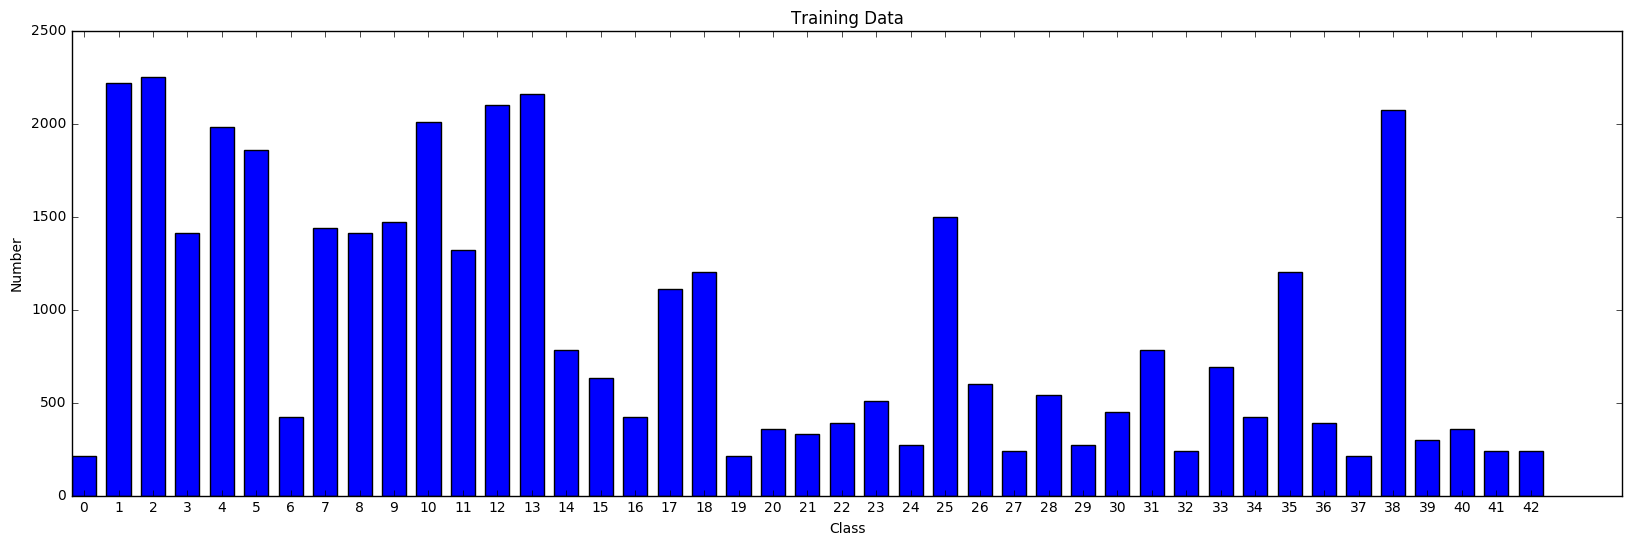

In [6]:
y_train_stat = peek_distribution(y_train, 'Training Data')

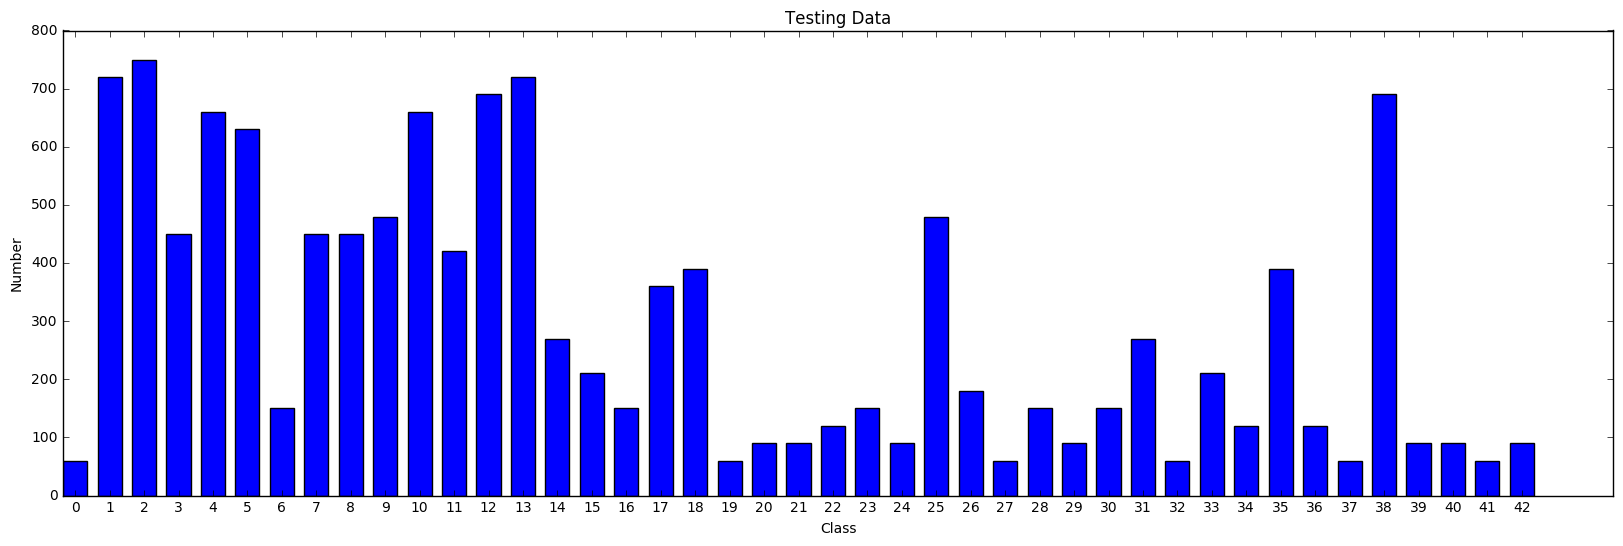

In [7]:
y_test_stat = peek_distribution(y_test, 'Testing Data')

 2\. the following cells will display some sample of the image

In [8]:
def sample_display(X, y, gray = False):
    plt.rcParams['figure.figsize'] = 6, 3
    f, ax = plt.subplots(n_classes//10 + 1, 10)
    for i in range(n_classes):
        idx = np.where(y == i)[0][0]
        j = i//10; k = i % 10
        ax[j][k].imshow(X[idx])
        if not gray:
            ax[j][k].imshow(X[idx])
        else:
            ax[j][k].imshow(X[idx], cmap = 'gray')
    off = np.vectorize(lambda x:x.axis('off'))
    off(ax)
    plt.show()               

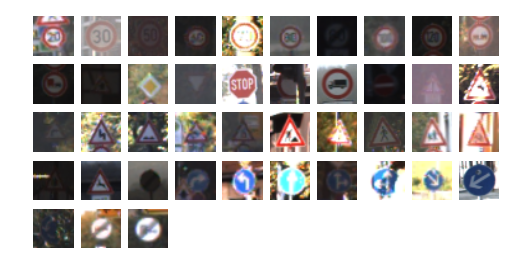

In [9]:
## check a sample of training data
sample_display(X_train, y_train)

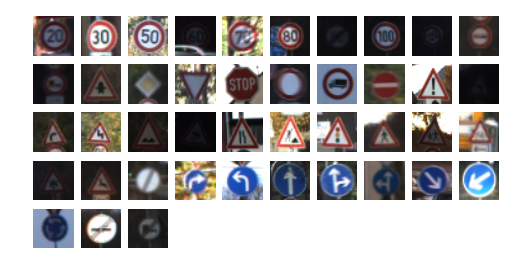

In [10]:
## check a sample of a testing data
sample_display(X_test, y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [11]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [12]:
## grayscale the image
X_train = np.mean(X_train, axis = 3)
X_test = np.mean(X_test, axis = 3)

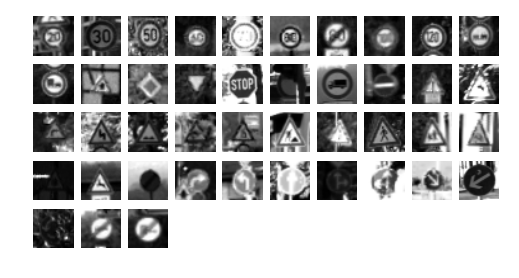

In [13]:
sample_display(X_train, y_train, True)

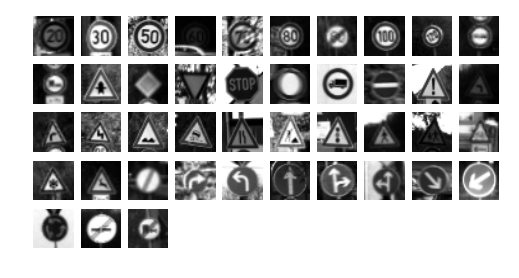

In [14]:
sample_display(X_test, y_test, True)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1. I average greyscale the images. In my country, color is important for identifying tracffic signs, but as my exploration on the data, the shape of those signs tell everything.
2. For the classes, I apply OHE(this is not really done above yet) and then make them float32, in order to fit in the softmax optimizer.
3. Because the distribution is bad, I am going to oversample the images and then shuffle (in following cells). 

In [15]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

---
The following cells will generate the validation set and do some preprocessing mentioned in Question 1

1\. Make the validation set

In [16]:
from sklearn.model_selection import train_test_split as split
X_all, y_all = X_train, y_train # the validation data will be reused.
X_train, X_val, y_train, y_val = split(X_all, y_all, test_size = 0.10, random_state = 52)
print(X_train.shape)

(35288, 32, 32)


2\. Oversample the training data

In [17]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(random_state=42)
train_idc, y_train = ros.fit_sample(np.arange(X_train.shape[0]).reshape([-1,1]), y_train)
X_train = X_train[train_idc.reshape([-1])]

3\. OHE the labels (__mentioned in Question 1__)

In [18]:
## ohe the labels
def ohe(y):
    y = y.reshape([-1, 1])
    return (np.arange(n_classes) == y).astype(np.float32)

## now do the ohe
y_train = ohe(y_train)
y_val = ohe(y_val)
y_test = ohe(y_test)

## reshape the X for tensorflow usage
X_train = X_train.reshape([-1, imsize, imsize, n_channels])
X_val = X_val.reshape([-1, imsize, imsize, n_channels])
X_test = X_test.reshape([-1, imsize, imsize, n_channels])

4\. Shuffle all the data set 

In [19]:
from sklearn.utils import shuffle 
X_train, y_train = shuffle(X_train, y_train, random_state = 36)
X_val, y_val = shuffle(X_val, y_val, random_state = 36)
n_train = y_train.shape[0]

In [20]:
print("There'are %d training data and %d validation data" %(n_train, y_val.shape[0]))

There'are 86645 training data and 3921 validation data


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I split the data from the pickle file "train.p" into training and validation data using sklearn's train_test_split method, so that the validation set is roughly of the same distribution as the original data. The ratio for validation set is 0.10.

NOTE: I will reuse the validation data for training after tunning the hyper-parameters. 

In [21]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [58]:
import tensorflow as tf
batch_size = 256
epoch = n_train - n_train % batch_size ## will use n_step in training, log with approximate epoch
patch_size = [5, 5, 3]
depth = [32, 64, 128]
n_hidden = 256
n_unseen = 6
test_feed = 256

graph = tf.Graph()

with graph.as_default(): 
    """ 
    The architecture is conv-conv-drop-conv-pool-fc-drop-fc-out 
    """
    net_train_X = tf.placeholder(tf.float32, shape = (batch_size, imsize, imsize, n_channels))
    net_train_y = tf.placeholder(tf.float32, shape = (batch_size, n_classes))
    
    net_val_X = tf.constant(X_val.astype('float32'))
    net_test_X = tf.placeholder(tf.float32, shape = (test_feed, imsize, imsize, n_channels))
    net_test_Xx = tf.placeholder(tf.float32, shape = (n_test%test_feed, imsize, imsize, n_channels))
    test_n = tf.placeholder(tf.float32, shape = (n_unseen, imsize, imsize, n_channels))
    ## Variables
    ## f for filter, b for bias
    ## fc for fully connected
    f1 = tf.Variable(tf.truncated_normal([patch_size[0], patch_size[0], n_channels, depth[0]], stddev = 0.03))
    b1 = tf.Variable(tf.zeros([depth[0]]))
    f2 = tf.Variable(tf.truncated_normal([patch_size[1], patch_size[1], depth[0], depth[1]], stddev = 0.05))
    b2 = tf.Variable(tf.zeros([depth[1]]))
    f3 = tf.Variable(tf.truncated_normal([patch_size[2], patch_size[2], depth[1], depth[2]], stddev = 0.07))
    b3 = tf.Variable(tf.zeros([depth[2]]))
    fc1_w = tf.Variable(tf.truncated_normal([imsize//16*imsize//16*depth[-1], n_hidden], stddev = 0.1))
    fc1_b = tf.Variable(tf.constant(1.0, shape = [n_hidden]))
    fc2_w = tf.Variable(tf.truncated_normal([n_hidden, n_classes], stddev = 0.2))
    fc2_b = tf.Variable(tf.constant(1.0, shape = [n_classes]))
    
    def model(data, drop = False): 
        conv = tf.nn.conv2d(data, f1, [1, 2, 2, 1], padding = 'SAME')
        relu = tf.nn.relu(conv + b1)     
        conv = tf.nn.conv2d(relu, f2, [1, 2, 2, 1], padding = 'SAME')
        relu = tf.nn.relu(conv + b2)
        dropped = tf.nn.dropout(relu, .5) if drop else relu
        conv = tf.nn.conv2d(dropped, f3, [1, 2, 2, 1], padding = 'SAME')
        relu = tf.nn.relu(conv + b3) 
        pool = tf.nn.max_pool(relu, [1, 2, 2, 1], [1, 2, 2, 1], padding = 'SAME')      
        
        shape = pool.get_shape().as_list()
        reshape = tf.reshape(pool, [shape[0], shape[1]*shape[2]*shape[3]])
        dropped = tf.nn.dropout(reshape, .5) if drop else reshape
        hidden = tf.nn.relu(tf.matmul(dropped, fc1_w) + fc1_b)  
        return tf.matmul(hidden, fc2_w) + fc2_b
    
    
    logits = model(net_train_X, True)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, net_train_y))
    global_step = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(1e-3, global_step, 500, .98, staircase = True)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step = global_step)
    train_pred = tf.nn.softmax(model(net_train_X))
    
    val_pred = tf.nn.softmax(model(net_val_X))
    test_pred = tf.nn.softmax(model(net_test_X))
    test_pred_end = tf.nn.softmax(model(net_test_Xx))
    test_pred_n = tf.nn.softmax(model(test_n))
    saver = tf.train.Saver()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My model is a 9-layer Convolutional Neural Network. The architecture is 

``` 
Conv(5x5x32) -> Conv(5x5x64) -> Dropout0.5 -> Conv(3x3x128) -> Max Pool -> Dropout0.5 -> Dense256 -> OUTPUT
```

In [23]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [24]:
def accuracy(pred, y):
    return 100.0 * np.sum(np.argmax(y, axis = 1) == np.argmax(pred, axis = 1))/float(y.shape[0])

In [25]:
def run_test(sess):
    '''this is a function that run test in batches'''
    test_accs = []
    for i in range(n_test//test_feed):
        data = X_test[i * test_feed:(i + 1) * test_feed]
        pred_batch = sess.run(test_pred, feed_dict = {net_test_X : data})
        test_accs.append(accuracy(pred_batch, y_test[i * test_feed:(i + 1) * test_feed]))
        
    test_acc = np.mean(test_accs)
    
    n_rem = n_test % test_feed
    rem_data = X_test[-n_rem:]
    pred_batch = sess.run(test_pred_end, feed_dict = {net_test_Xx : rem_data})
    rem_acc = accuracy(pred_batch, y_test[-n_rem:])
    
    return (test_acc * n_test + rem_acc * n_rem)/n_test

In [34]:
num_steps = 30001
with tf.Session(graph = graph) as session:
    tf.global_variables_initializer().run()
    ep = 0
    for step in range(num_steps):
        offset = (step * batch_size) % (n_train - batch_size)
        batch_X = X_train[offset:(offset + batch_size), :, :, :]
        batch_y = y_train[offset:(offset + batch_size)]
        
        feed_dict = {net_train_X : batch_X, net_train_y : batch_y}
        
        _, stage_loss, pred = session.run([optimizer, loss, train_pred], feed_dict=feed_dict)      
        if (step * batch_size % (10*epoch) == 0):
            print('batch loss at epoch %d: %f' % (ep, stage_loss))
            print('batch acc: %.2f%%' % accuracy(pred, batch_y))
            print('val acc: %.2f%%' % accuracy(val_pred.eval(), y_val))
            ep += 10

    test_acc = run_test(session)    
    save_path = saver.save(session, "test")
    print('Test acc: %.2f%%' % test_acc)

batch loss at epoch 0: 231.721954
batch acc: 1.56%
val acc: 2.04%
batch loss at epoch 10: 0.909966
batch acc: 90.62%
val acc: 84.37%
batch loss at epoch 20: 0.401063
batch acc: 99.22%
val acc: 95.84%
batch loss at epoch 30: 0.175623
batch acc: 98.05%
val acc: 96.84%
batch loss at epoch 40: 0.160542
batch acc: 99.22%
val acc: 98.09%
batch loss at epoch 50: 0.104090
batch acc: 99.61%
val acc: 98.72%
batch loss at epoch 60: 0.092974
batch acc: 99.61%
val acc: 98.78%
batch loss at epoch 70: 0.145199
batch acc: 100.00%
val acc: 99.03%
batch loss at epoch 80: 0.070354
batch acc: 99.61%
val acc: 99.06%
Test acc: 96.00%


__Note__: 
The hyperparameters were tuned above, next I will reuse the validation set to train the network one more time from scratch 

In [27]:
# prepare the full original training data from the pickle file
X_all = X_all.reshape([-1, imsize, imsize, n_channels])
ros = RandomOverSampler(random_state=36)
all_idc, y_all = ros.fit_sample(np.arange(X_all.shape[0]).reshape([-1,1]), y_all)
X_all = X_all[all_idc.reshape([-1])]
y_all = ohe(y_all)
n_all = y_all.shape[0]

In [35]:
# train the model from scratch with the hyperparameters tuned
X_all, y_all = shuffle(X_all, y_all, random_state = 40)
num_steps = 30001
with tf.Session(graph = graph) as session:
    tf.global_variables_initializer().run()
    ep = 0
    for step in range(num_steps):
        offset = (step * batch_size) % (n_all - batch_size)
        batch_X = X_all[offset:(offset + batch_size), :, :, :]
        batch_y = y_all[offset:(offset + batch_size)]
        feed_dict = {net_train_X : batch_X, net_train_y : batch_y}
        
        _, stage_loss, pred = session.run([optimizer, loss, train_pred], feed_dict=feed_dict)      
        if (step * batch_size % (10*epoch) == 0):
            print('batch loss at epoch %d: %f' % (ep, stage_loss))
            print('batch acc: %.2f%%' % accuracy(pred, batch_y))
            ep += 10
            
    test_acc = run_test(session)
    save_path = saver.save(session, "test_all")
    print('Test acc: %.2f%%' % test_acc)
print(save_path)

batch loss at epoch 0: 152.817490
batch acc: 1.95%
batch loss at epoch 10: 0.678792
batch acc: 93.75%
batch loss at epoch 20: 0.300956
batch acc: 97.66%
batch loss at epoch 30: 0.205772
batch acc: 97.27%
batch loss at epoch 40: 0.102030
batch acc: 99.61%
batch loss at epoch 50: 0.120701
batch acc: 99.61%
batch loss at epoch 60: 0.057399
batch acc: 100.00%
batch loss at epoch 70: 0.051324
batch acc: 99.22%
batch loss at epoch 80: 0.031258
batch acc: 100.00%
Test acc: 96.41%
test_all


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- __Optimizer__: Adam Optimizer
- __Batch Size__: 256 <br \>
- __Epochs__: 80 epochs, I actually use batch feed to measure the training time. There are 100000 images in training set after oversampling and the batch size is 256. 
- __Hyperparameters__: 
  1. learning rate: I applied exponential decay learning rate
      $$ \alpha=0.001 \times 0.98^{step \over 500}$$
  2. variable initialization: The standard deviation for weights initialization is increasing downstream (forward), and  was tuned everywhere in order for the network to perform well with this architecture. This hyperparameters turns out the most effective point when refining the network. 


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

 * __My Starting Point__ <br \> 
  I've designed a network for the SVHN dataset, so I just plug that network here and it gives me 95.9% on test set. <br \>
 * __RGB information__ <br \>
 I've tried to feed the data without grayscale, however the result is quite similiar.<br \>
 * __Oversampling__<br \> We are dealing with imbalanced dataset here, so I've tried oversampling the minority. And here this technique gives extra 0.3-0.4 test accuracy<br \>
 * __Image Transformation__<br \> I'be thought about generating extra data by distorting or transforming the existing data. That might work, but due to personal schedule, I'll first focus on tensorflow in this project.  <br \>
 * __Bigger Batch__<br \> I think it's somehow equivalent to longer training given the same steps. I switch from 128 to 256. It gives me about 0.1 percent improvement. <br \>
 * __"Recycle" the Validation Set__<br \>This is the most effective way to improve the training. That gives me extra 0.2% to 0.5% in the test set. My belief is, The minority classes need more data to be trained. In some examples, people just split, test, and throw away the validation set, which I think is a big misleading. I did this too until I realized this is a waste of data.  With this approach, I achieved 97.05% test acccuracy at best.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

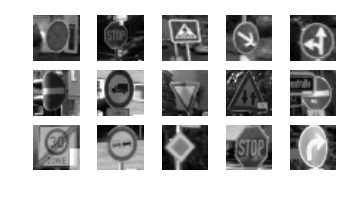

In [30]:
## I randomly explore German streets in Google Earth and capture those images 
import cv2
imgs = []
for i in range(1,16):
    imgs.append(cv2.imread('%d.png'%i))
imgs = [cv2.resize(x, (32, 32)) for x in imgs]
imgs = [np.mean(x, axis = 2) for x in imgs]
plt.rcParams['figure.figsize'] = 4, 2
f, ax = plt.subplots(3, 5)
for i in range(15):
    ax[i//5][i%5].imshow(imgs[i], cmap = 'gray')
off = np.vectorize(lambda x:x.axis('off'))
off(ax)
plt.show()

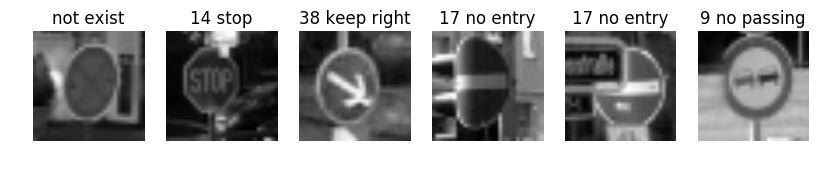

In [95]:
candidates = np.array([imgs[i] for i in [0, 1, 3, 5, 9, 11]])
title = ['not exist','14 stop', '38 keep right', '17 no entry', '17 no entry', '9 no passing']
y = [14, 38, 17, 17, 9]
plt.rcParams['figure.figsize'] = 10, 3
f, ax = plt.subplots(1, 6)
for i in range(6):
    ax[i].imshow(candidates[i], cmap = 'gray')
    ax[i].set_title(title[i]) 
off = np.vectorize(lambda x:x.axis('off'))
off(ax)
plt.show()
candidates = candidates.reshape((-1,32,32,1)).astype('float32')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The five candidate images are shown above, The reasons I chose these images are below:

the first one doesn't exist in the problem, but I am just curious about what the model will think this sign is.<br\> The third image is bent, It will be good to test the robustness of the model.<br \> The fourth is partially block by the street sign. <br\> The second and the last image should be the easiest to recognize. 

In [97]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import pandas as pd
names = pd.read_csv('signnames.csv')
with tf.Session(graph = graph) as session:
    saver.restore(session, './test')
    pred = session.run(test_pred_n, feed_dict={test_n:candidates})
    print("the predictions are:")
    print(names['SignName'][np.argmax(pred, axis = 1)])
    
    

the predictions are:
38    Keep right
13         Yield
38    Keep right
17      No entry
17      No entry
9     No passing
Name: SignName, dtype: object


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Except for the first one, which doesn't exist in the problem, the model sucessfully recognizes 4 out of 5 of the images. It takes the "Stop" sign wrong as a "Yield". The test accuracy is relatively high. The result is consistent in my own images. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [33]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [117]:
## check the top 5 probabilities of the stop sign.
for i in range(1, 6):
    idc = np.argsort(-pred[i])
    top_5 = pd.DataFrame(names['SignName'][idc[:5]])
    top_5['probability'] = pd.Series(pred[i][idc][:5], index=top_5.index)
    print("The top 5 the classes believe the %s sign are:" % names['SignName'][y[i-1]])
    print(top_5)
    print()

The top 5 the classes believe the Stop sign are:
                SignName  probability
13                 Yield     0.539668
3   Speed limit (60km/h)     0.165683
35            Ahead only     0.109496
14                  Stop     0.074543
38            Keep right     0.022293

The top 5 the classes believe the Keep right sign are:
           SignName   probability
38       Keep right  9.999961e-01
34  Turn left ahead  2.805630e-06
18  General caution  3.390305e-07
13            Yield  1.693469e-07
12    Priority road  1.215486e-07

The top 5 the classes believe the No entry sign are:
                                             SignName  probability
17                                           No entry     0.989493
7                               Speed limit (100km/h)     0.004833
42  End of no passing by vehicles over 3.5 metric ...     0.004630
14                                               Stop     0.000602
12                                      Priority road     0.000366

The to

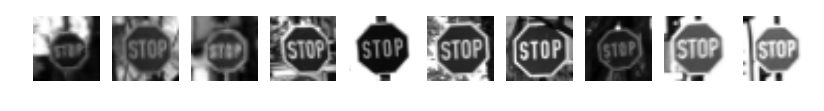

In [116]:
## some samples of the stop sign in training set
plt.rcParams['figure.figsize'] = 10, 1
f, ax = plt.subplots(1, 10)
y_deohe = np.argmax(y_train, axis = 1)
i = 0
for j in np.where(y_deohe == 14)[0][:10]:
    ax[i].imshow(X_train[j].reshape([32,32]), cmap = 'gray')
    ax[i].axis('off')
    i += 1
plt.show()   

**Answer:**
As the top_5 is shown for each images, the model is quite confusing when it try to recognize the stop sign. For the stop sign recognition, it has shown up on fourth of top k and the differences among the top_k are not as significant as those in the other 4 examples, which means the model is quite uncertain about its prediction. This might be a result of rough feature mapping. Stop sign contains 4 character. The convnet for recognizing characters can be as large as this one. An improvement for this project can be started with smaller stride or deeper feature maps.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.